<h1>Clustering With K-Means</h1>

Clustering analysis with k-means of a Spotify song dataset.

In [28]:
import pandas as pd
from qgrid import show_grid
import seaborn as sns
from pandas_profiling import ProfileReport
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from copy import deepcopy
from yellowbrick.cluster.elbow import kelbow_visualizer
from ipynb.fs.full.funPyModeling import status, cat_vars, coord_plot

<h3>Data Loading</h3>

In [17]:
data = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-01-21/spotify_songs.csv")

<h3>Dataset Status</h3>

In [18]:
status(data)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,track_id,0,0.000000,0,0.000000,28356,object
1,track_name,5,0.000152,0,0.000000,23449,object
2,track_artist,5,0.000152,0,0.000000,10692,object
3,track_popularity,0,0.000000,2703,0.082326,101,int64
4,track_album_id,0,0.000000,0,0.000000,22545,object
5,track_album_name,5,0.000152,0,0.000000,19743,object
6,track_album_release_date,0,0.000000,0,0.000000,4530,object
7,playlist_name,0,0.000000,0,0.000000,449,object
8,playlist_id,0,0.000000,0,0.000000,471,object
9,playlist_genre,0,0.000000,0,0.000000,6,object


There are NaNs in 'track_name', 'track_artist' and 'track_album_name'. Also, there are high cardinality variables, like 'track_name' and 'track_artist'.

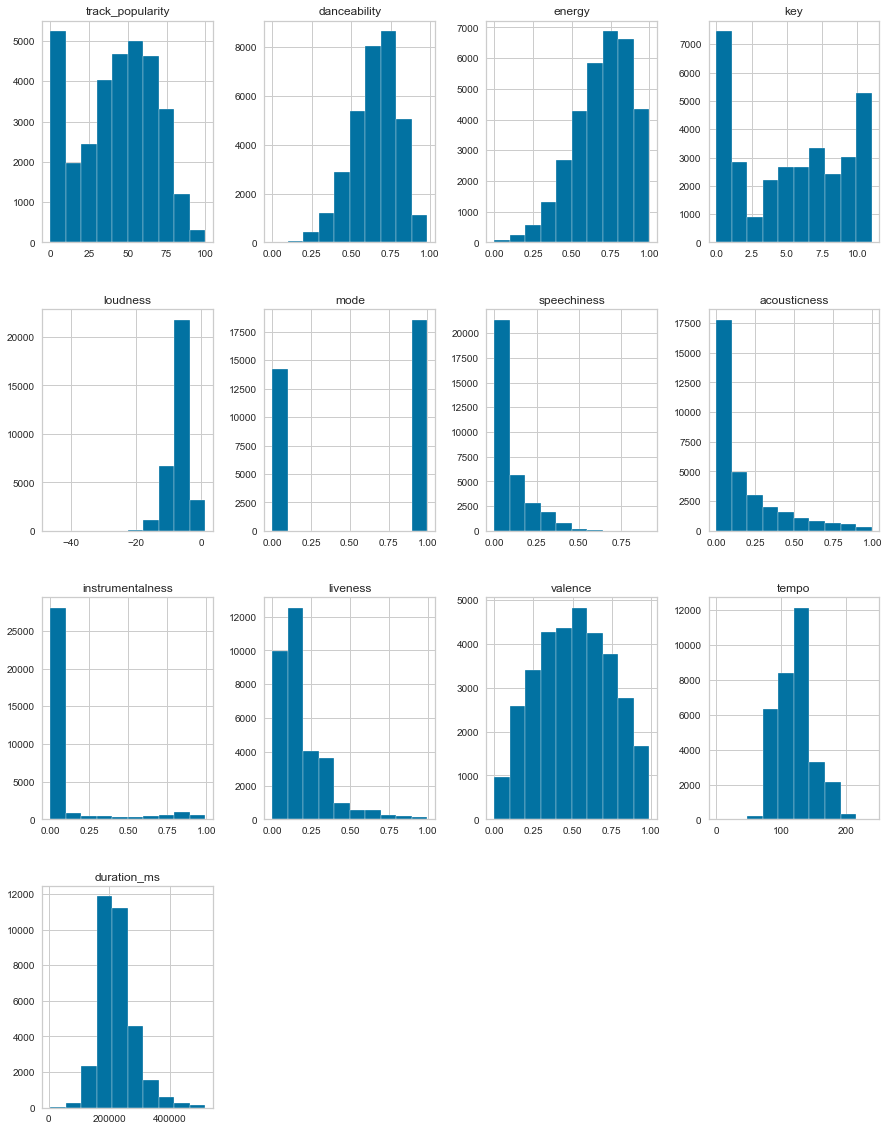

In [19]:
data.hist(figsize = (15,20));

In [20]:
ProfileReport(data, minimal=True)

<h3>Data Preparation</h3>

Dropping the categorical variables

In [21]:
x_data = data.drop(cat_vars(data), axis=1)

Normalizing variables

In [22]:
std_scaler = StandardScaler()
std_scaler.fit(x_data)
x_data_norm = std_scaler.transform(x_data)

<h3>Models Creation</h3>

In [ ]:
cl_model = KMeans(
    n_clusters=3,  # number of clusters
    init='k-means++',
    max_iter=100, 
    random_state=0
)

Fitting the model

In [ ]:
cl_model.fit(x_data_norm)

Predicting the clusters

In [24]:
pred_cl = cl_model.predict(x_data_norm)

<h3>Distortion</h3>

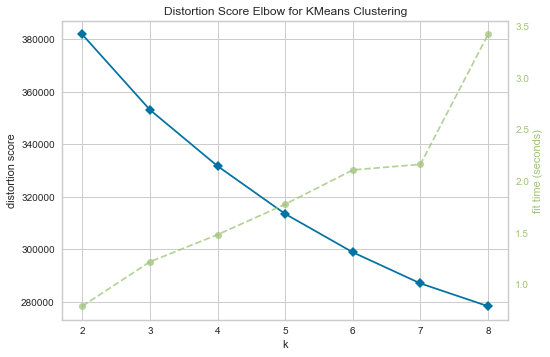

C:\Users\Tec\Anaconda3\envs\PythonCPU\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


KElbowVisualizer(ax=<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 k=None, locate_elbow=False, model=None)

In [26]:
cl_model2 = deepcopy(cl_model)

kelbow_visualizer(cl_model2, x_data_norm, k=(2,9), locate_elbow=False)

Increasing the number of clusters, the distortion decreases, but the model becomes more complex.

<h3>Cord Plot</h3>

In [27]:
cluster_var = 'cluster'
x_data_cl = x_data.copy()
x_data_cl[cluster_var] = cl_model.predict(x_data_norm)

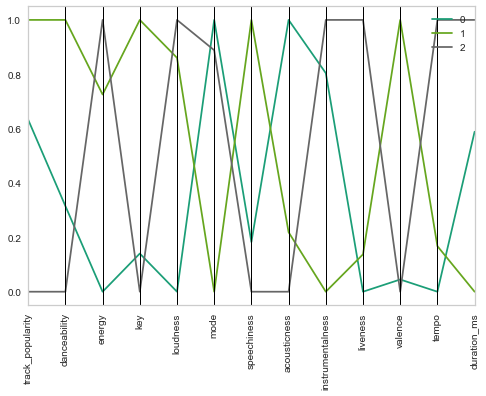

In [29]:
d_orig, d_transf = coord_plot(x_data_cl, cluster_var)

<h3>Insights</h3>

From the clustering analysis, i can see that the more popular songs are the ones that have the highest danceability, speechiness and valence, and the ones that arent so popular are the ones that have low danceability, speechiness, acoustiness and valence.

This kind of analysis is useful because it can be used in other areas like medical, marketing. etc.